In [1]:
import cv2

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
flags = [i for i in dir(cv2) if i.startswith('COLOR')]

In [5]:
len(flags)

295

In [6]:
flags[40]

'COLOR_BAYER_GR2BGRA'

In [7]:
planet = cv2.imread('./desktop/planet0.tif')

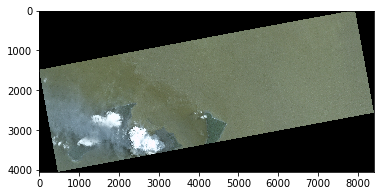

In [8]:
plt.imshow(planet)

In [9]:
planet = cv2.cvtColor(planet, cv2.COLOR_BGRA2RGBA)

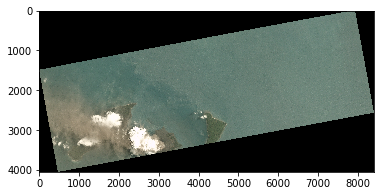

In [10]:
plt.imshow(planet)

In [11]:
brown_lo = (120, 111, 89, 255)
brown_hi = (166, 152, 126, 255)

In [12]:
mask_brown = cv2.inRange(planet, brown_lo, brown_hi)

In [13]:
gray_lo = (157, 159, 151, 255)
gray_hi = (219, 208, 195, 255)

In [14]:
mask_gray = cv2.inRange(planet, gray_lo, gray_hi)

In [15]:
ash_mask = mask_brown + mask_gray

In [16]:
ash_result = cv2.bitwise_and(planet, planet, mask=ash_mask)

<function matplotlib.pyplot.show(*args, **kw)>

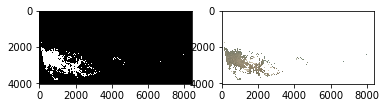

In [17]:
plt.subplot(1, 2, 1)
plt.imshow(ash_mask, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(ash_result)
plt.show

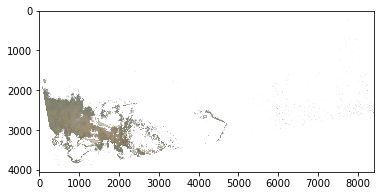

In [18]:
blur = cv2.GaussianBlur(ash_result, (7,7), 0)
plt.imshow(blur)
plt.show()

In [19]:
#Highlight ash cloud red and save as a tiff file
ash_result[ash_mask>0]=(0,0,255,255)
cv2.imwrite('ash_cloud.tif', ash_result)

True

In [20]:
path = "./desktop/planet"

planet_pics = []
for i in range(4):
    pic = cv2.cvtColor(cv2.imread(path + str(i) + ".tif"), cv2.COLOR_BGRA2RGBA)
    planet_pics.append(pic)

In [21]:
def segment_ash(image):
    ''' Attempts to segment the ash out of the provided image'''
    
    # Set the gray range 
    gray_lo = (157, 159, 151, 255)
    gray_hi = (219, 208, 195, 255)
    
    # Apply the gray mask
    mask_gray = cv2.inRange(image, gray_lo, gray_hi)
    
    # Set the brown range 
    brown_lo = (120, 111, 89, 255)
    brown_hi = (166, 152, 126, 255)
    
    # Apply the brown mask 
    mask_brown = cv2.inRange(image, brown_lo, brown_hi)
    
    # Combine the two masks
    final_mask = mask_brown + mask_gray
    result = cv2.bitwise_and(image, image, mask=final_mask)
    
    # Clean up the segmentation using a blur
    blur = cv2.GaussianBlur(result, (7, 7), 0)
    return blur


In [22]:
results = [segment_ash(pic) for pic in planet_pics]

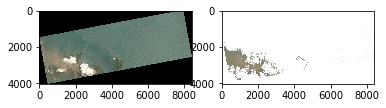

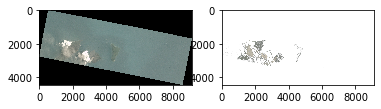

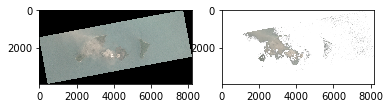

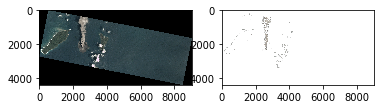

In [23]:
for i in range(0,4):
    plt.subplot(1, 2, 1)
    plt.imshow(planet_pics[i])
    plt.subplot(1, 2, 2)
    plt.imshow(results[i])
    plt.show()